In [12]:
import pandas as pd

df = pd.read_csv('BusinessGrantsbyNeighborhood.csv')
df.describe()

,Business Name,Neighborhood
count,1848,1848
unique,1841,23
top,Saigon One Restaurant,Dorchester
freq,2,306


In [13]:
df_count = df.groupby(["Neighborhood"], as_index=False).count().rename(columns={'Business Name':'BusinessCount'})

In [15]:
population = [28621, 19588, 9336, 48330, 19120, 7143, 122191, 13451, 43066, 37733, 33009, 41012, 23834, 17886, 10805, 29386, 54905, 37917, 5579, 29373, 31561]
df_count["population"] = population

In [16]:
normalized = df_count["BusinessCount"]/df_count["population"]
df_count["normalized"] = normalized

<function matplotlib.pyplot.show(close=None, block=None)>

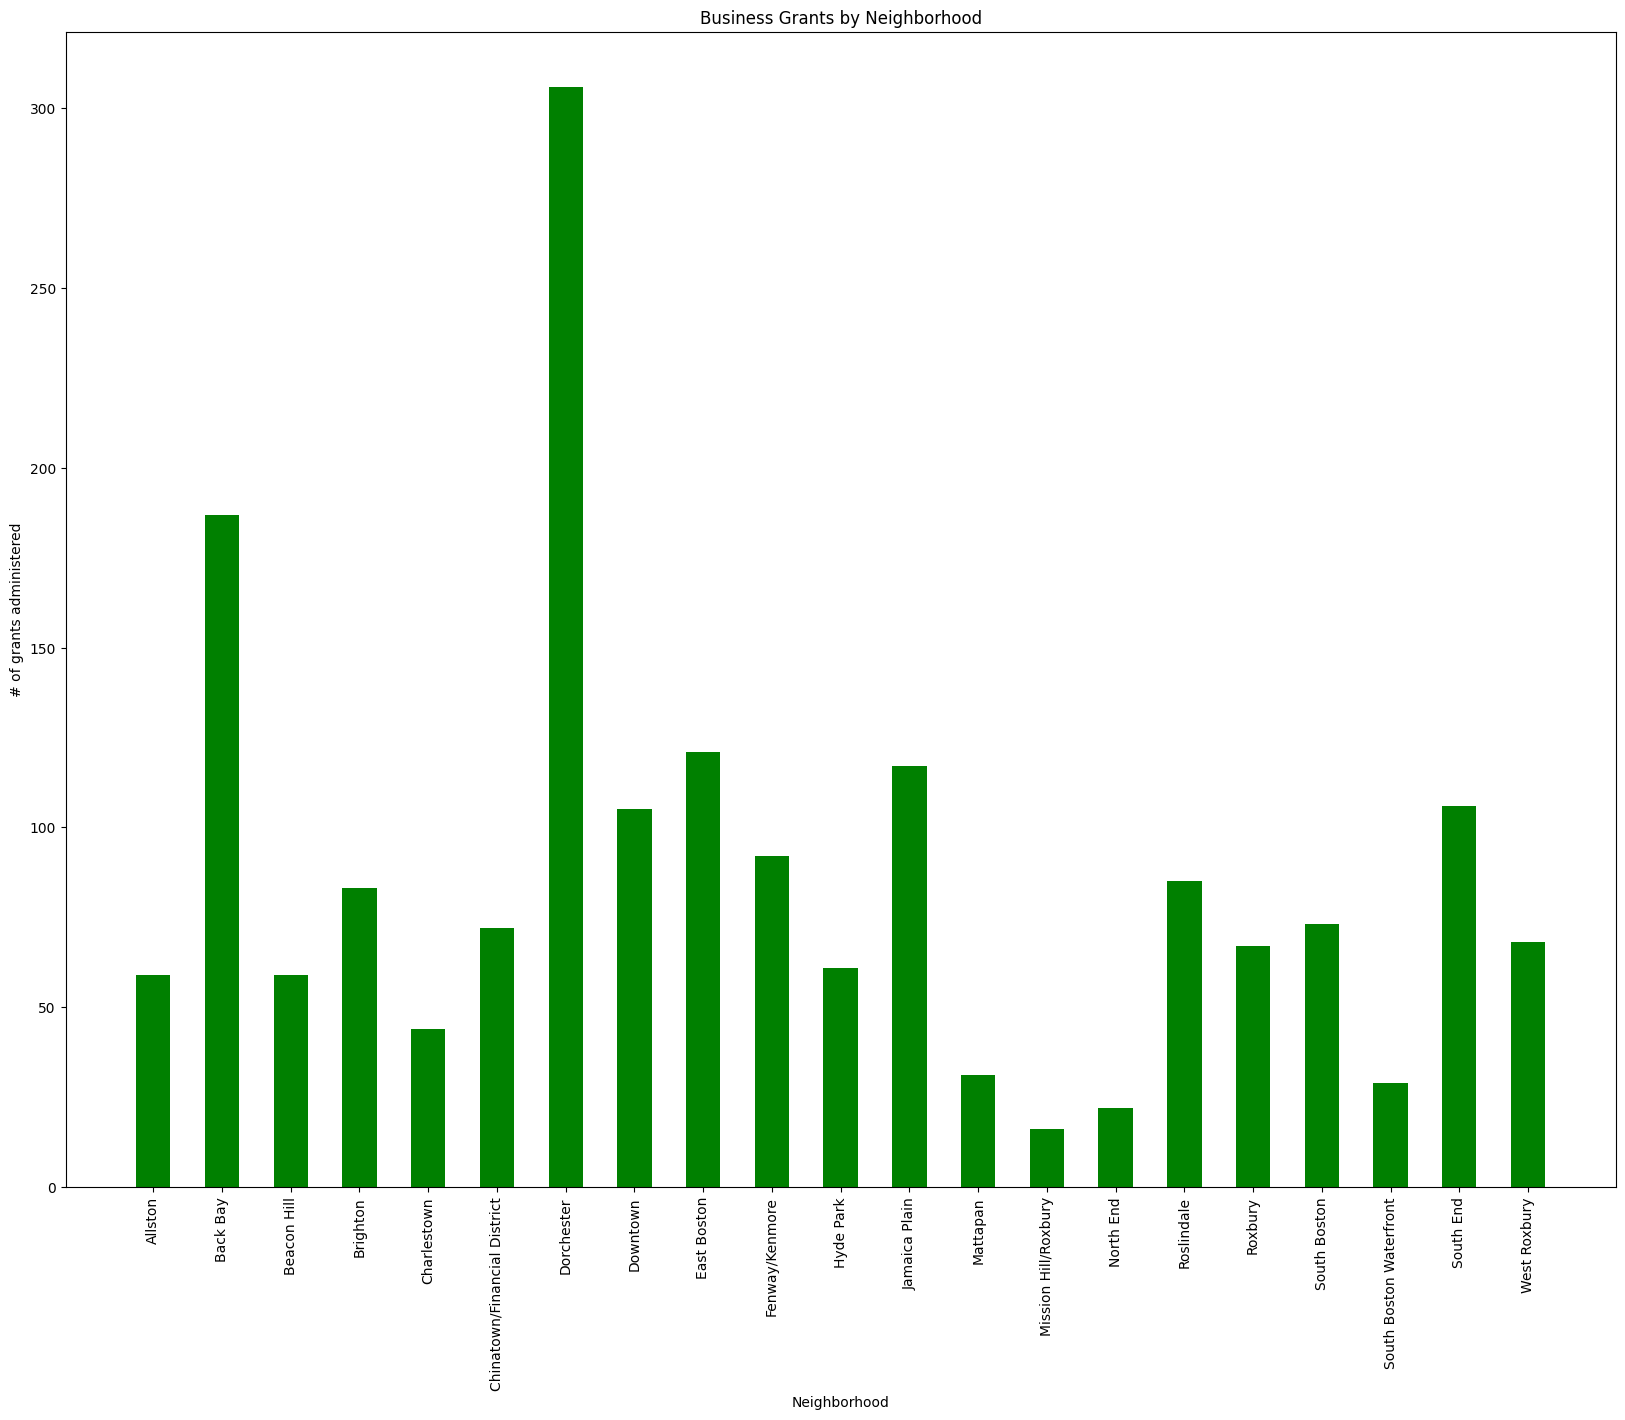

In [17]:
import numpy as np
import matplotlib.pyplot as plt

XScale = df_count["Neighborhood"]
YScale = df_count["BusinessCount"]

fig = plt.figure(figsize = (20, 15))

plt.bar(XScale, YScale, color = "green", width = 0.5)
plt.xticks(rotation = 90)

plt.xlabel("Neighborhood")
plt.ylabel("# of grants administered")
plt.title("Business Grants by Neighborhood")

plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

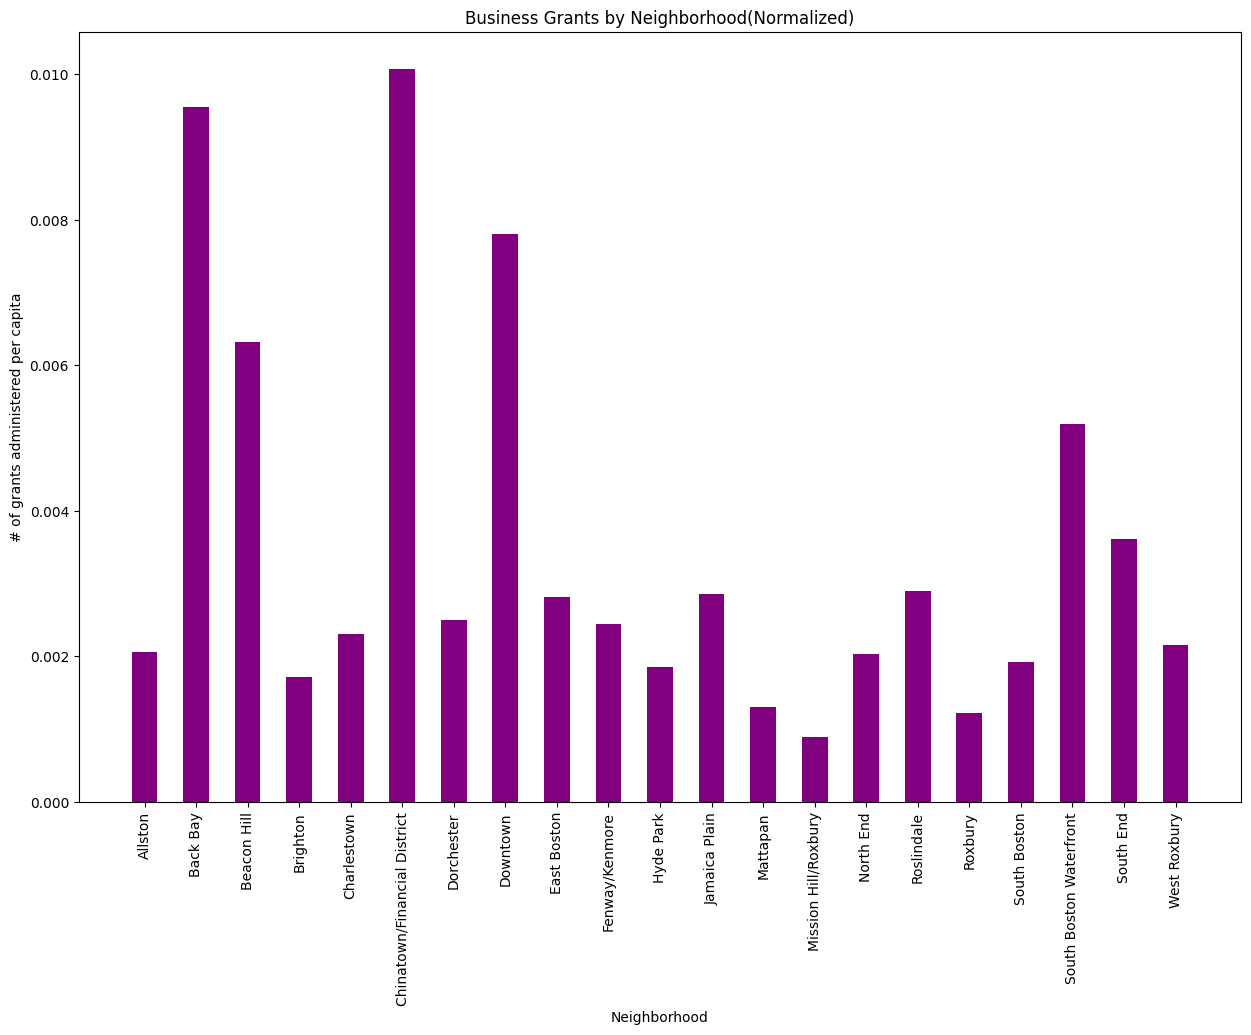

In [23]:
import numpy as np
import matplotlib.pyplot as plt

XScale = df_count["Neighborhood"]
YScale = df_count["normalized"]

fig = plt.figure(figsize = (15, 10))

plt.bar(XScale, YScale, color = "purple", width = 0.5)
plt.xticks(rotation = 90)

plt.xlabel("Neighborhood")
plt.ylabel("# of grants administered per capita")
plt.title("Business Grants by Neighborhood(Normalized)")

plt.show 

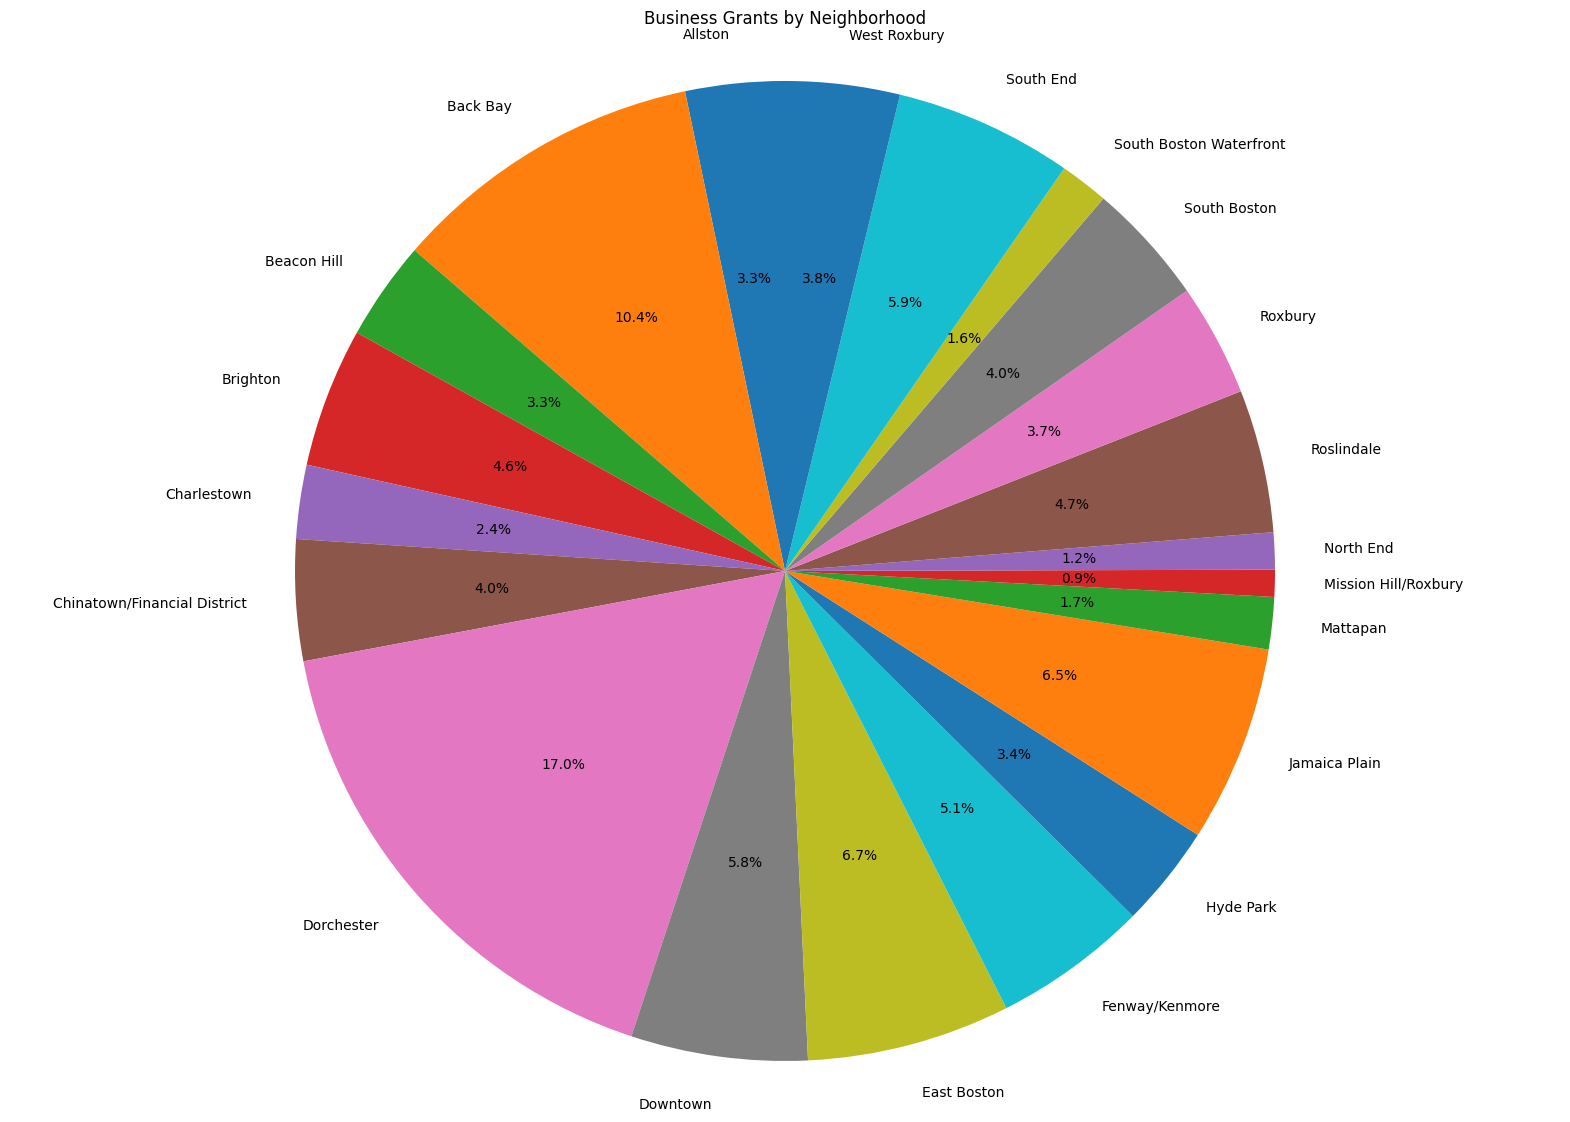

In [22]:
labels = df_count["Neighborhood"]
total_biz = df_count["BusinessCount"].sum()
df_count["BusinessProp"] = df_count["BusinessCount"]/total_biz
sizes = df_count["BusinessProp"]
df_count
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize =(20, 14))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title("Business Grants by Neighborhood")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

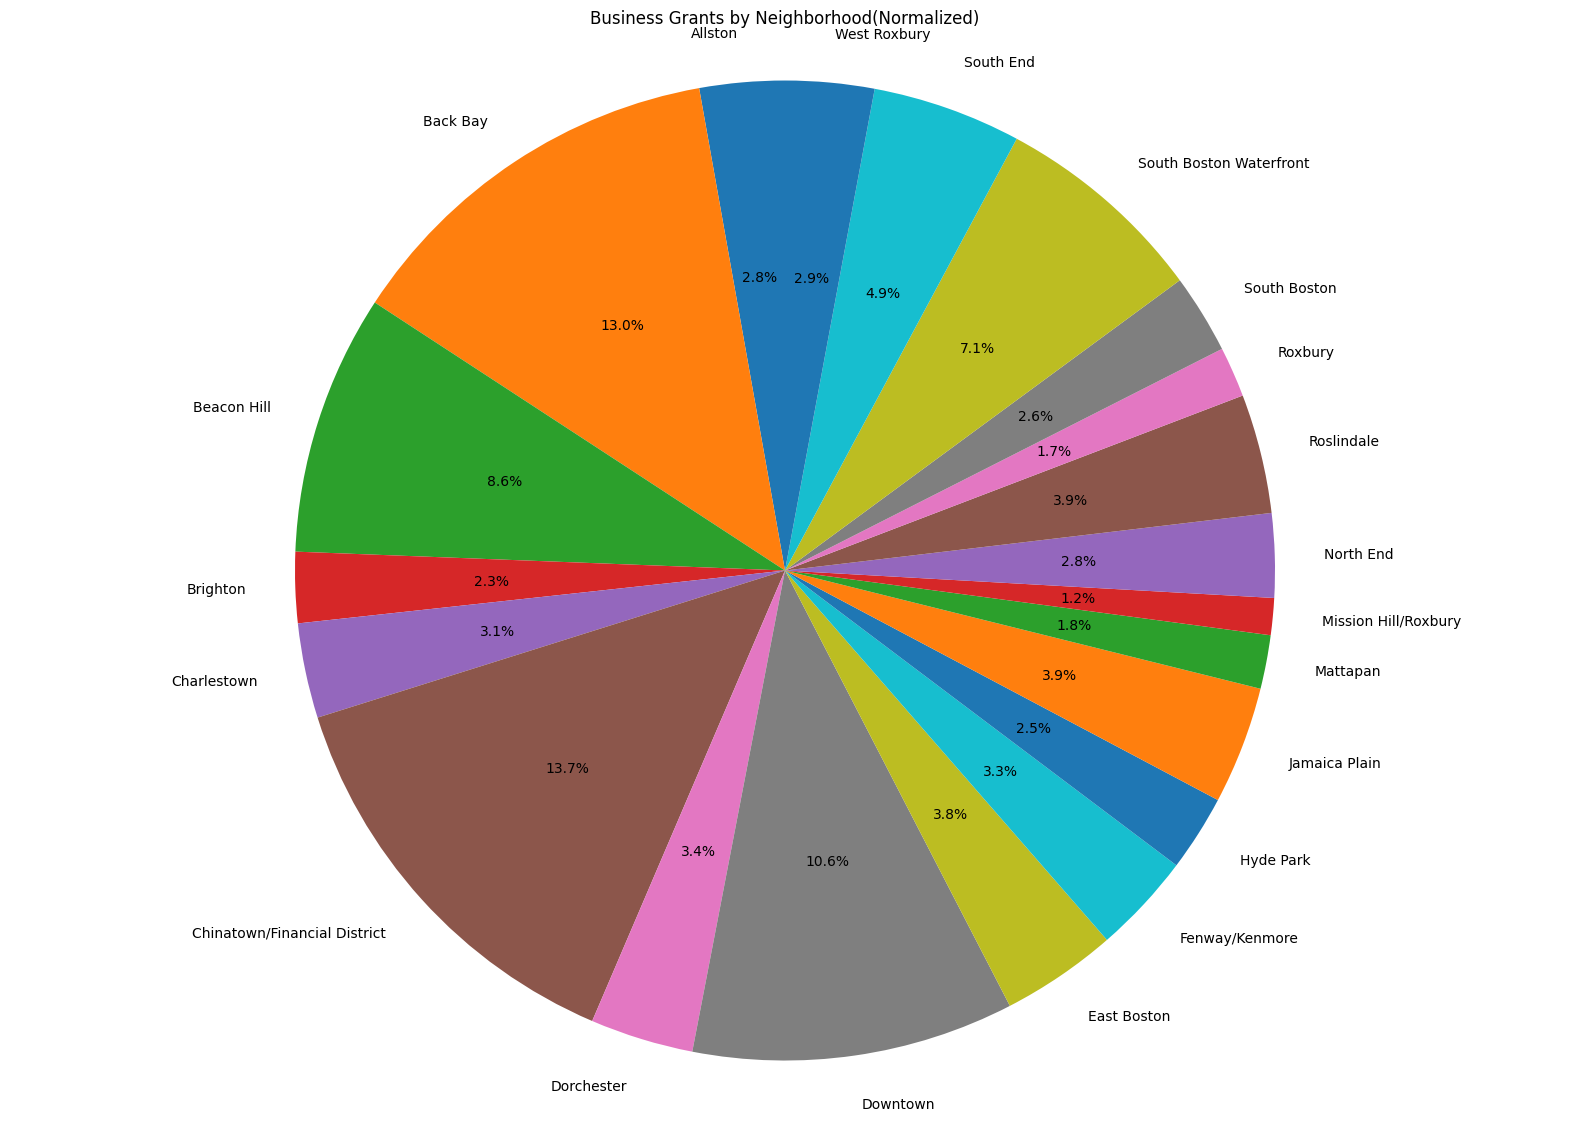

In [19]:
labels = df_count["Neighborhood"]
total_biz = df_count["normalized"].sum()
df_count["BusinessProp"] = df_count["normalized"]/total_biz
sizes = df_count["BusinessProp"]
df_count
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize =(20, 14))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title("Business Grants by Neighborhood(Normalized)")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [42]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import geopandas as gpd
import json

In [39]:
with open('boston-neighborhoods.json') as json_data:
    boston_data = json.load(json_data)

In [43]:
geoboston=gpd.read_file('boston-neighborhoods.json')

In [44]:
geoboston.head()

,Name,density,geometry
0,Roslindale,5.58,"MULTIPOLYGON (((-71.12593 42.27200, -71.12575 ..."
1,Jamaica Plain,7.62,"POLYGON ((-71.10499 42.32609, -71.10488 42.326..."
2,Mission Hill,18.24,"POLYGON ((-71.09043 42.33576, -71.09275 42.333..."
3,Longwood Medical Area,0.00,"POLYGON ((-71.09811 42.33672, -71.09892 42.336..."
4,Bay Village,0.00,"POLYGON ((-71.06663 42.34877, -71.06739 42.348..."


In [54]:
boston_map = folium.Map(location=[42.329143, -71.076449], zoom_start=11)
# boston_map.choropleth(
#     geo_data=geoboston
# )
boston_map

In [29]:
import pandas as pd

df = pd.read_csv('BusinessGrantsbyNeighborhood.csv')
df.describe()

,Business Name,Neighborhood
count,1848,1848
unique,1841,23
top,Saigon One Restaurant,Dorchester
freq,2,306


In [30]:
df_count = df.groupby(["Neighborhood"], as_index=False).count().rename(columns={'Business Name':'BusinessCount'})
print(df_count)

                    Neighborhood  BusinessCount
0                        Allston             59
1                       Back Bay            187
2                    Beacon Hill             59
3                       Brighton             83
4                    Charlestown             44
5   Chinatown/Financial District             72
6                     Dorchester            306
7                       Downtown            105
8    Downtown/Financial District              1
9             Downtown/North End             44
10                   East Boston            121
11                Fenway/Kenmore             92
12                     Hyde Park             61
13                 Jamaica Plain            117
14                      Mattapan             31
15          Mission Hill/Roxbury             16
16                     North End             22
17                    Roslindale             85
18                       Roxbury             67
19                  South Boston        

In [31]:
df_count.at[5,'Neighborhood']='Chinatown'
df_count.at[8,'Neighborhood']='Downtown'
df_count.at[9,'Neighborhood']='North End'
df_count.at[11,'Neighborhood']='Fenway'
df_count.at[15,'Neighborhood']='Mission Hill'

In [32]:
df_count = df_count.groupby('Neighborhood', as_index=False).sum()
print(df_count)

               Neighborhood  BusinessCount
0                   Allston             59
1                  Back Bay            187
2               Beacon Hill             59
3                  Brighton             83
4               Charlestown             44
5                 Chinatown             72
6                Dorchester            306
7                  Downtown            106
8               East Boston            121
9                    Fenway             92
10                Hyde Park             61
11            Jamaica Plain            117
12                 Mattapan             31
13             Mission Hill             16
14                North End             66
15               Roslindale             85
16                  Roxbury             67
17             South Boston             73
18  South Boston Waterfront             29
19                South End            106
20             West Roxbury             68


In [ ]:
boston_neighborhoods = boston_data['features']
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude']

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in boston_neighborhoods:
    neighborhood_name = data['properties']['Name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon
    neighborhood_lon = neighborhood_latlon

    neighborhoods = neighborhoods.append({'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [36]:
neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,Roslindale,"[[[[-71.12592656722312, 42.27200445346726], [-...","[[[[-71.12592656722312, 42.27200445346726], [-..."
1,Jamaica Plain,"[[[-71.10499158300003, 42.3260930173557], [-71...","[[[-71.10499158300003, 42.3260930173557], [-71..."
2,Mission Hill,"[[[-71.09043371458033, 42.33576129552895], [-7...","[[[-71.09043371458033, 42.33576129552895], [-7..."
3,Longwood Medical Area,"[[[-71.09810833985203, 42.33672170994753], [-7...","[[[-71.09810833985203, 42.33672170994753], [-7..."
4,Bay Village,"[[[-71.06662865656764, 42.3487740128554], [-71...","[[[-71.06662865656764, 42.3487740128554], [-71..."


In [55]:
folium.Choropleth(
    geo_data=geoboston,
    name="choropleth",
    data=df_count,
    columns=["Neighborhood", "BusinessCount"],
    key_on='feature.properties.Name',
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=.2,
    legend_name="Business Grant Count",
).add_to(boston_map)

folium.LayerControl().add_to(boston_map)

boston_map

In [65]:
boston_map = folium.Map(location=[42.329143, -71.076449], zoom_start=11)
# boston_map.choropleth(
#     geo_data=geoboston
# )
boston_map

In [66]:
folium.Choropleth(
    geo_data=geoboston,
    name="choropleth",
    data=df_count,
    columns=["Neighborhood", "normalized"],
    key_on='feature.properties.Name',
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=.2,
    legend_name="Business Grant Count Normalized",
).add_to(boston_map)

folium.LayerControl().add_to(boston_map)

boston_map

In [67]:
print(df_count)

               Neighborhood  BusinessCount  population  normalized
0                   Allston             59       28621    0.002061
1                  Back Bay            187       19588    0.009547
2               Beacon Hill             59        9336    0.006320
3                  Brighton             83       48330    0.001717
4               Charlestown             44       19120    0.002301
5                 Chinatown             72        7143    0.010080
6                Dorchester            306      122191    0.002504
7                  Downtown            106       13451    0.007880
8               East Boston            121       43066    0.002810
9                    Fenway             92       37733    0.002438
10                Hyde Park             61       33009    0.001848
11            Jamaica Plain            117       41012    0.002853
12                 Mattapan             31       23834    0.001301
13             Mission Hill             16       17886    0.00